## Customer Churn Prediction
#### Contents
- **Data verification and Statistical Analysis**
- **Exploratory Data Analysis**
- **Data preprocessing**
- **Model building and Evaluation**
- **Productionizing**

### Import Libraries

In [1]:
# importing Libraries

# for Data Analysis
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier


!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Load dataset

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\akann\Documents\10ALYTICS\CASE STUDIES\PYTHON- PROJECTS\MACHINE LEARNING\SUPERVISED ML\Customer Churn Prediction -CONNECTTEL\Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Duplicate dataset

In [3]:
df2 = df.copy()

### Data verification: Verify Data types, number of features and rows.

In [4]:
# Data verification: Data types, number of features and rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking for missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

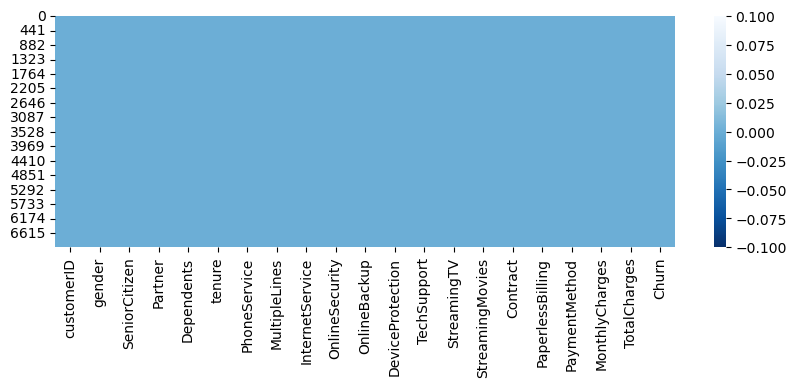

In [5]:
# checking for missing values
print(df.isnull().sum())

# visualizing missing values
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar= True, cmap="Blues_r")

### Statistical analysis

In [6]:
# statistical analysis of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Exploratory Data Analysis

### Univariate Analysis

**Analysis of the Tenure feature**

Text(0.5, 1.0, 'Distribution of Customer Tenure')

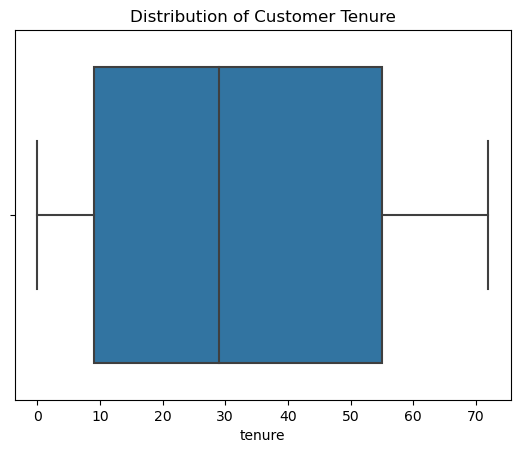

In [7]:
sns.boxplot(x=df["tenure"])
plt.title('Distribution of Customer Tenure')

**Narration:**
- **The Tenure feature shows no outliers, with 50% of its data distributed between 9 and 55. It has a median of 29 and exhibits a right-skewed distribution**

**Analysis of the Monthly charges feature**

Text(0.5, 1.0, 'Distribution of Monthly charges')

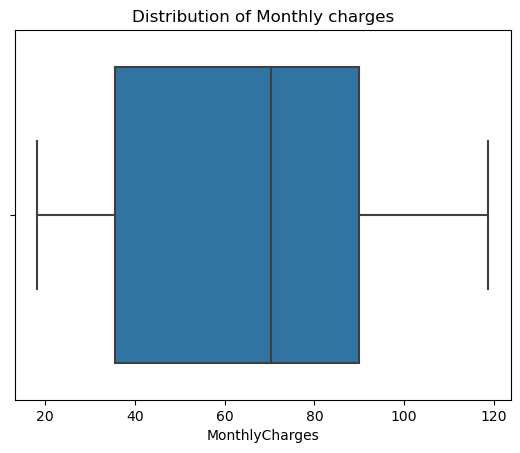

In [8]:
sns.boxplot(x=df["MonthlyCharges"])
plt.title('Distribution of Monthly charges')

**Narration:**
- **The MonthlyCharges feature shows no outliers, with 50% of its data distributed between 35.5 and 89.9. It has a median of 70.4 and exhibits a left-skewed distribution**

**Analysis of the citizen feature**

Text(0.5, 1.0, 'Distribution of citizens')

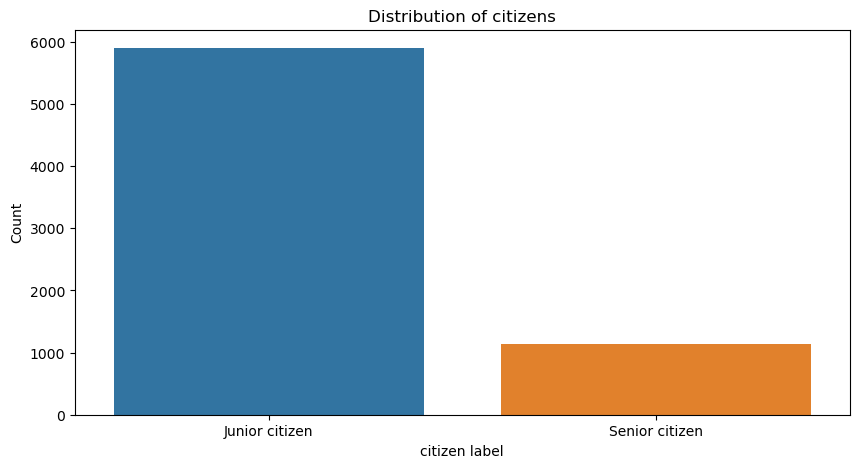

In [9]:
# Building the seniority function
def seniority(SeniorCitizen):
    if SeniorCitizen== 1:
        return 'Senior citizen'
    else :
        return 'Junior citizen'
        
df['seniority'] =df['SeniorCitizen'].apply(seniority)

plt.figure(figsize=(10,5))
sns.countplot(x='seniority', data=df)
plt.xlabel('citizen label')
plt.ylabel('Count')
plt.title('Distribution of citizens')

**Narration:**
- **The data shows that the majority of the customers are junior citizens and just a few are senior citizens**

**Analysis of the Partner feature**

Text(0.5, 1.0, 'Partner Count Analysis')

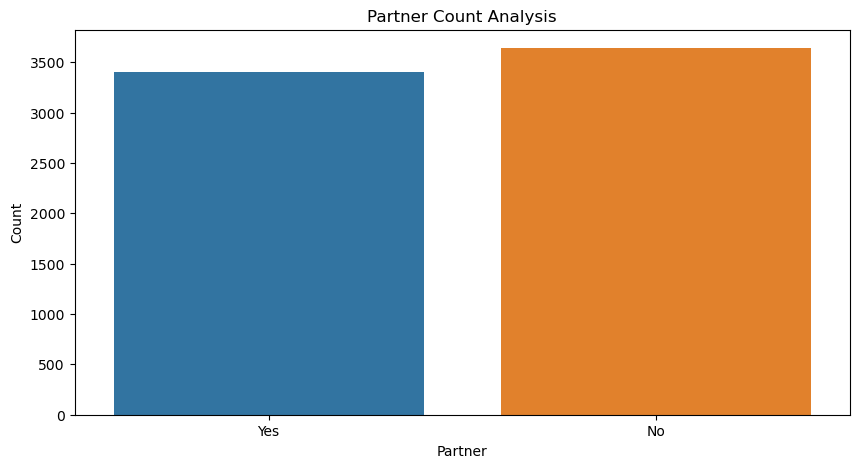

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='Partner', data=df)
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Partner Count Analysis')

**Narration:**
- **The data shows that single customers are slightly more than the married customers**

### Bivariate Analysis

#### Investigating Churn by the Senior citizen feature

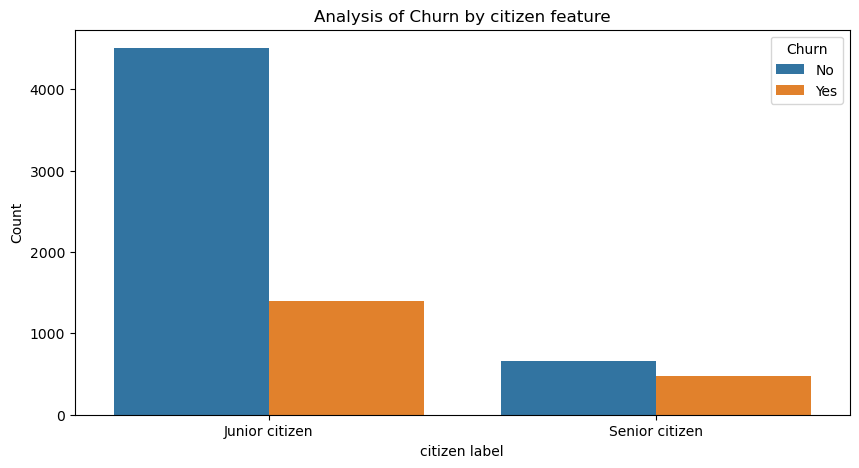

In [11]:
# Investigating Churn by senior citizen feature
plt.figure(figsize=(10,5))
sns.countplot(x='seniority', data=df, hue='Churn')
plt.xlabel('citizen label')
plt.ylabel('Count')
plt.title('Analysis of Churn by citizen feature');

**Narration:**
- **The junior citizen class has about 25% of its population churning while the churn rate is even higher in the senior citizen class with about 80% churn rate. The junior citizens have higher numbers of churn cases, this is because they make up the majority of the customer base.**

#### Investigating Churn by the Gender

Text(0.5, 1.0, 'Analysis of Churn by Gender')

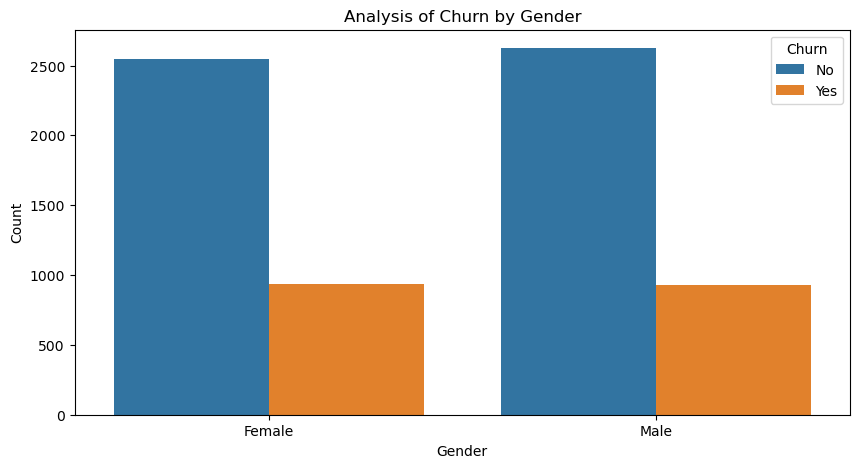

In [12]:
# Building the Gender function
def sex(gender):
    if gender== 'Male':
        return 'Male'
    else :
        return 'Female'
        
df['sex'] =df['gender'].apply(sex)

plt.figure(figsize=(10,5))
sns.countplot(x='sex', data=df, hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Analysis of Churn by Gender')

**Narration:**
- **The churn rate appears to be the same across both Genders**

#### Investigating Churn by the Tenure

Text(0.5, 1.0, 'Analysis of churn by Tenure')

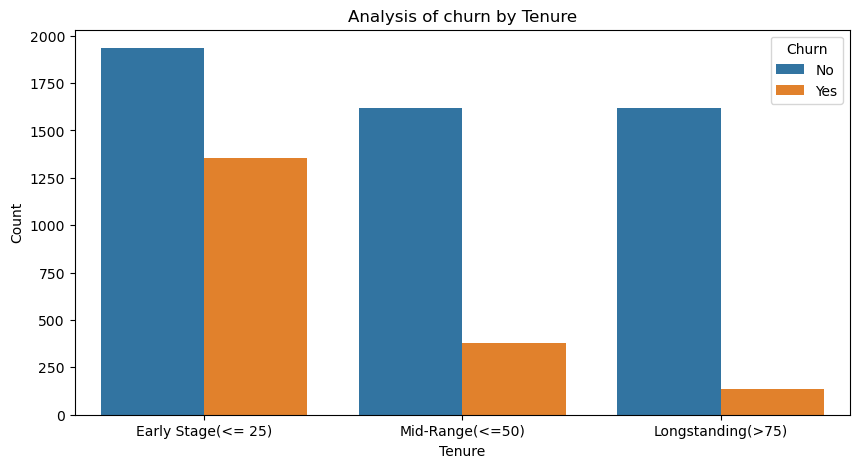

In [13]:
def duration(tenure):
    if tenure <= 25:
        return "Early Stage(<= 25)"
    elif tenure<= 55:
        return "Mid-Range(<=50)"
    else :
        return "Longstanding(>75)"
df['Duration'] = df['tenure'].apply(duration)

# investigating churn by tenure
plt.figure(figsize=(10,5))
sns.countplot(x='Duration', data=df, hue= 'Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Analysis of churn by Tenure')

**Narration:**
- **The Churn rates vary across different customer stages: the early stage exhibits a Churn rate of approximately 74%, the mid-range class experiences a Churn rate of around 24%, and the longstanding class demonstrates the lowest Churn rate, standing at just 9%.**

#### Investigating Churn by the Phone service

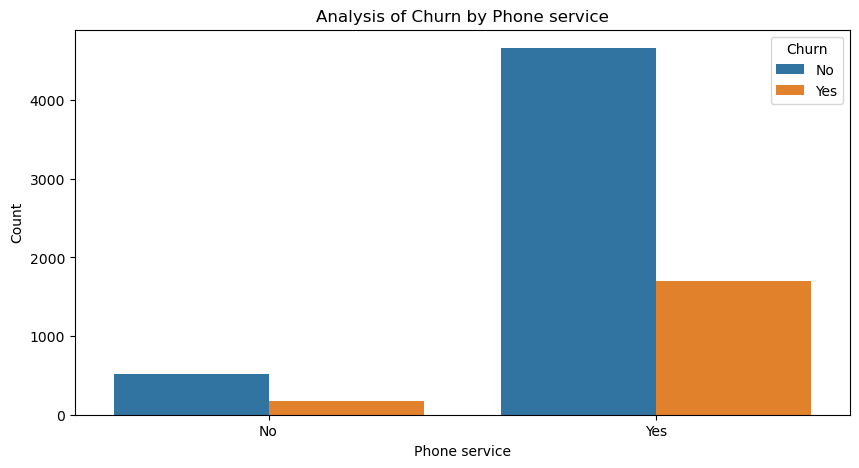

In [14]:
# Investigating Churn by Phone service
plt.figure(figsize=(10,5))
sns.countplot(x='PhoneService', data=df, hue='Churn')
plt.xlabel('Phone service')
plt.ylabel('Count')
plt.title('Analysis of Churn by Phone service');

**Narration:**
- **Although there are more customers subscibed to phone services than those who aren't, the churn rate seems to be unaffected by this feature as churn is almost the same for both classes**

### Label Encoding

In [15]:
# Label Encoding categorical variables as Numericals
def dgender(gender):
    if gender == 'Male':
        return 1
    else :
        return 0
df['gender_'] = df['gender'].apply(dgender)


def dpartner(Partner):
    if Partner == 'Yes':
        return 1
    else :
        return 0
df['Partner_'] = df['Partner'].apply(dpartner)


def ddependents(Dependents):
    if Dependents == 'Yes':
        return 1
    else :
        return 0
df['Dependents_'] = df['Dependents'].apply(ddependents)



def dPhoneService(PhoneService):
    if PhoneService == 'Yes':
        return 1
    else :
        return 0
df['PhoneService_'] = df['PhoneService'].apply(dPhoneService)


def dMultipleLines(MultipleLines):
    if MultipleLines == 'Yes':
        return 1
    else :
        return 0
df['MultipleLines_'] = df['MultipleLines'].apply(dMultipleLines)



def dInternetService(InternetService):
    if InternetService == 'DSL':
        return 1
    elif InternetService == 'Fiber optic':
        return 2
    else :
        return 0
df['InternetService_'] = df['InternetService'].apply(dInternetService)


def dOnlineSecurity(OnlineSecurity):
    if OnlineSecurity == 'Yes':
        return 1
    else :
        return 0
df['OnlineSecurity_'] = df['OnlineSecurity'].apply(dOnlineSecurity)


def dContract(Contract):
    if Contract == 'Month-to-month':
        return 1
    elif Contract == 'One year':
        return 2
    else :
        return 3
df['Contract_'] = df['Contract'].apply(dContract)


def dPaperlessBilling(PaperlessBilling):
    if PaperlessBilling == 'Yes':
        return 1
    else :
        return 0
df['PaperlessBilling_'] = df['PaperlessBilling'].apply(dPaperlessBilling)


def dPaymentMethod(PaymentMethod):
    if PaymentMethod == 'Electronic check':
        return 1
    elif PaymentMethod == 'Mailed check':
        return 2
    elif PaymentMethod == 'Bank transfer (automatic)':
        return 3
    else :
        return 4
df['PaymentMethod_'] = df['PaymentMethod'].apply(dPaymentMethod)


def dOnlineBackup(OnlineBackup):
    if OnlineBackup == 'Yes':
        return 1
    else :
        return 0
df['OnlineBackup_'] = df['OnlineBackup'].apply(dOnlineBackup)


def dDeviceProtection(DeviceProtection):
    if DeviceProtection == 'Yes':
        return 1
    else :
        return 0
df['DeviceProtection_'] = df['DeviceProtection'].apply(dDeviceProtection)


def dTechSupport(TechSupport):
    if TechSupport == 'Yes':
        return 1
    else :
        return 0
df['TechSupport_'] = df['TechSupport'].apply(dTechSupport)


def dStreamingTV(StreamingTV):
    if StreamingTV == 'Yes':
        return 1
    else :
        return 0
df['StreamingTV_'] = df['StreamingTV'].apply(dStreamingTV)


def dStreamingMovies(StreamingMovies):
    if StreamingMovies == 'Yes':
        return 1
    else :
        return 0
df['StreamingMovies_'] = df['StreamingMovies'].apply(dStreamingMovies)


def dChurn(Churn):
    if Churn == 'Yes':
        return 1
    else :
        return 0
df['Churn_'] = df['Churn'].apply(dChurn)

In [16]:
# Creating a data frame containing the numerical variables
df3 = df[['gender_', 'SeniorCitizen', 'Partner_', 'Dependents_',
       'tenure', 'PhoneService_', 'MultipleLines_', 'InternetService_',
       'OnlineSecurity_', 'OnlineBackup_', 'DeviceProtection_', 'TechSupport_',
       'StreamingTV_', 'StreamingMovies_', 'Contract_', 'PaperlessBilling_',
       'PaymentMethod_', 'MonthlyCharges', 'TotalCharges', 'Churn_']]

### Multivariate Analysis

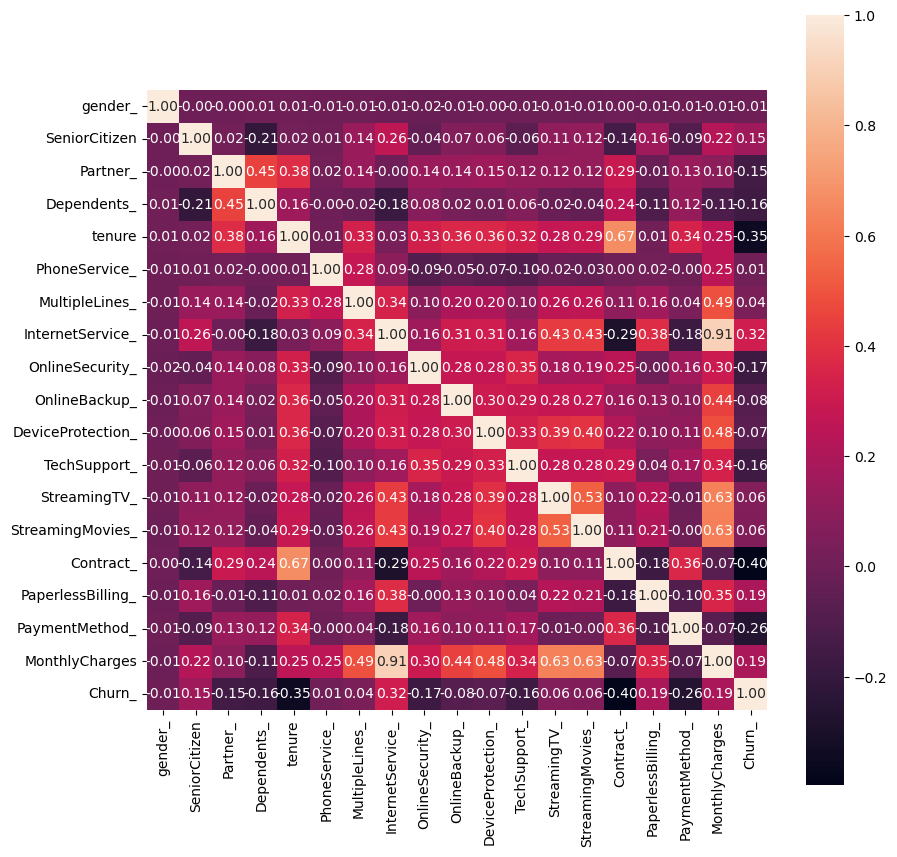

In [17]:
# Correlation between Churn and other features in the Dataset
plt.figure(figsize=(10,10))
hm= sns.heatmap(df3.corr(), cbar=True, annot=True, square= True, fmt='.2f', annot_kws= {'size': 10})

**Narration:**
- **A Negative correlation exists between Payment method and Churn.This suggests that customers using online the online platforms are less likely to churn while those using the check method of payment are more likely to churn. (types of payment methods are arranged in an ascending order of scale from check payments to online payments).**
- **A Negative correlation exists between contract and churn. This suggests that as the length of contract increases the likelihood of customer to churn reduces.(Contract lengths are arranged in an ascending order of scale)**
- **A Negative correlation exists between tenure and Churn which indicates that the longer a customer has been subscribed to the company the less likely they are to churn and vice versa**
- **A Positive correlation exists between internet service and Churn which suggest that as the internet service charge increases the likelihood of a customer to churn also increases and vice versa**

### Data Pre-Processing

In [18]:
# Replace non-numeric values with NaN and drop rows with NaN
df3 = df3.apply(pd.to_numeric, errors='coerce').dropna()

# Convert the column to float type
df3['TotalCharges'] = df3['TotalCharges'].astype(float)

In [19]:
# segment data
label = df3.pop('Churn_')

In [20]:
# standardization of features using Standard Scaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df3),columns= df3.columns)
scaled_df

,gender_,SeniorCitizen,Partner_,Dependents_,tenure,PhoneService_,MultipleLines_,InternetService_,OnlineSecurity_,OnlineBackup_,DeviceProtection_,TechSupport_,StreamingTV_,StreamingMovies_,Contract_,PaperlessBilling_,PaymentMethod_,MonthlyCharges,TotalCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,-0.854336,-0.287852,-0.633746,1.378330,-0.723918,-0.639260,-0.790186,-0.796849,-0.826735,0.828939,-1.144520,-1.161694,-0.994194
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.854336,-0.287852,1.577918,-0.725516,1.381372,-0.639260,-0.790186,-0.796849,0.373926,-1.206361,-0.274531,-0.260878,-0.173740
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,-0.287852,1.577918,1.378330,-0.723918,-0.639260,-0.790186,-0.796849,-0.826735,0.828939,-0.274531,-0.363923,-0.959649
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,-0.854336,-0.287852,1.577918,-0.725516,1.381372,1.564308,-0.790186,-0.796849,0.373926,-1.206361,0.595457,-0.747850,-0.195248
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,0.996525,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,-0.796849,-0.826735,0.828939,-1.144520,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.990658,-0.440327,1.035617,1.533025,-0.343137,0.327189,1.170500,-0.287852,1.577918,-0.725516,1.381372,1.564308,1.265525,1.254943,0.373926,0.828939,-0.274531,0.664868,-0.129180
7028,-1.009430,-0.440327,1.035617,1.533025,1.612573,0.327189,1.170500,0.996525,-0.633746,1.378330,1.381372,-0.639260,1.265525,1.254943,0.373926,0.828939,1.465445,1.276493,2.241056
7029,-1.009430,-0.440327,1.035617,1.533025,-0.872808,-3.056334,-0.854336,-0.287852,1.577918,-0.725516,-0.723918,-0.639260,-0.790186,-0.796849,-0.826735,0.828939,-1.144520,-1.170004,-0.854514
7030,0.990658,2.271039,1.035617,-0.652305,-1.158016,0.327189,1.170500,0.996525,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,-0.796849,-0.826735,0.828939,-0.274531,0.319168,-0.872095


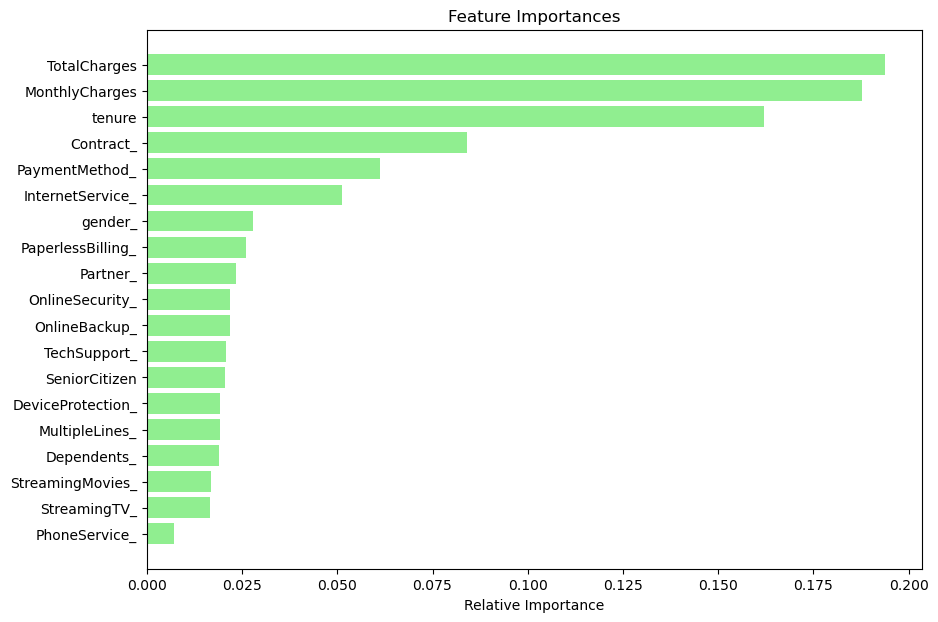

In [21]:
# plotting a feature importance chart to Identify key features from the data set
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df3,label)

# fit the model
model = RandomForestClassifier()
model.fit(df_scaled, label)
feature_names = list(df3.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Narration:**

The top 5 most important features in predicting Churn are:
- **Total charges**
- **Monthly charges**
- **Tenure**
- **Contract**
- **Payment method**

### Model Building

#### Split data into training and testing set

In [22]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, label, test_size=0.3, random_state= 1)

In [23]:
# Instantiate Logistic Regression model
log_reg = LogisticRegression()

# Train model
log_reg.fit(x_train, y_train)

LogisticRegression()

In [24]:
# Model Prediction file
log_pred = log_reg.predict(x_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1-score:", f1_score(y_test, log_pred))
print("AUC-ROC:", roc_auc_score(y_test, log_pred))

Logistic Regression
Accuracy: 0.8037914691943128
Precision: 0.6509635974304069
Recall: 0.5477477477477477
F1-score: 0.5949119373776908
AUC-ROC: 0.7214622983111728


#### Create a confusion matrix for logistic regression

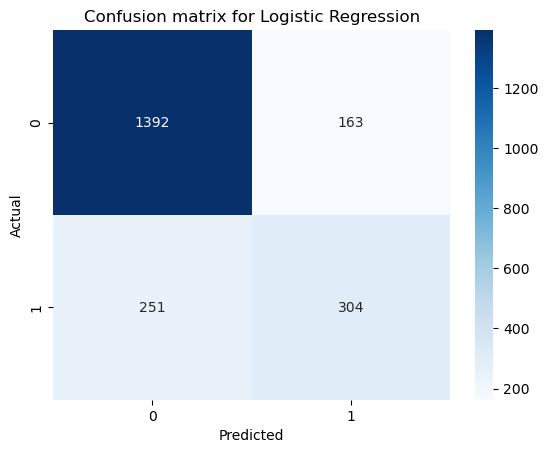

In [25]:
# Create a confusion matrix
# TRUE POSITIVE 1,1 - correctly identifying customers that will churn
# FALSE POSITIVE 0,1 - incorrectly identifying customers that will churn
# TRUE NEGATIVE 0,0 - correctly identifying customers that won't churn
# FALSE NEGATIVE 1,0 - incorrectly identifying customers that won't churn


lcm= confusion_matrix(y_test,log_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot= True, cmap= 'Blues', fmt= 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

**Narration:**
- **The model predicted 1392 true negatives and 251 false negatives results**
- **The model predicted 304 true positives and 163 false positives results**

In [26]:
# Instatiate Gradient boosting model
g_boost = GradientBoostingClassifier()

# Train model
g_boost.fit(x_train, y_train)

GradientBoostingClassifier()

In [27]:
g_pred = g_boost.predict(x_test)
print("Gradient boosting")
print("Accuracy:", accuracy_score(y_test, g_pred))
print("Precision:", precision_score(y_test, g_pred))
print("Recall:", recall_score(y_test, g_pred))
print("F1-score:", f1_score(y_test, g_pred))
print("AUC-ROC:", roc_auc_score(y_test, g_pred))

Gradient boosting
Accuracy: 0.795734597156398
Precision: 0.6422018348623854
Recall: 0.5045045045045045
F1-score: 0.5650857719475278
AUC-ROC: 0.7020914805480721


#### Create a confusion matrix for Gradient boosting model

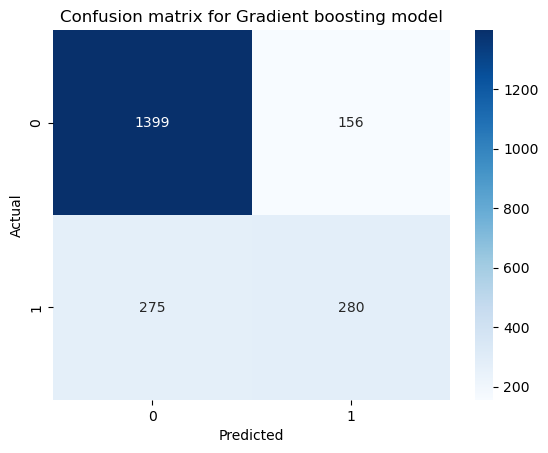

In [28]:
# Create a confusion matrix
# TRUE POSITIVE 1,1 - correctly identifying customers that will churn
# FALSE POSITIVE 0,1 - incorrectly identifying customers that will churn
# TRUE NEGATIVE 0,0 - correctly identifying customers that won't churn
# FALSE NEGATIVE 1,0 - incorrectly identifying customers that won't churn


lcm= confusion_matrix(y_test,g_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot= True, cmap= 'Blues', fmt= 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Gradient boosting model')
plt.show()

**Narration:**
- **The model predicted 1398 true negatives and 274 false negatives results**
- **The model predicted 281 true positives and 157 false positives results**

In [29]:
# Instatiate Naive Bayes model
nb_model = GaussianNB()

# Train model
nb_model.fit(x_train, y_train)

GaussianNB()

In [30]:
# Model Prediction file
nb_pred = nb_model.predict(x_test)
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred))
print("Recall:", recall_score(y_test, nb_pred))
print("F1-score:", f1_score(y_test, nb_pred))
print("AUC-ROC:", roc_auc_score(y_test, nb_pred))

Naive Bayes
Accuracy: 0.7720379146919432
Precision: 0.5486842105263158
Recall: 0.7513513513513513
F1-score: 0.6342205323193916
AUC-ROC: 0.7653862866081514


### Hyperparameter Optimization for Naive Bayes model

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Instantiate the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(x_train, y_train)

# Test the model on the test set
y_proba = nb_model.predict_proba(x_test)[:, 1]
y_pred = (y_proba > 0.3).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Model Evaluation Metrics:
Accuracy: 0.7441
Precision: 0.5085
Recall: 0.8108
ROC-AUC Score: 0.8361
Confusion Matrix:
[[1120  435]
 [ 105  450]]


#### Create a confusion matrix for Naive Bayes model

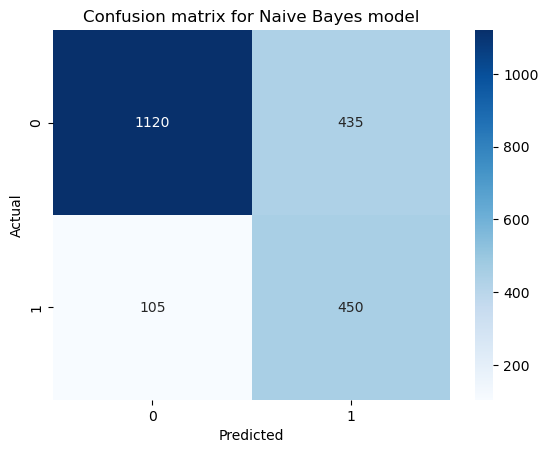

In [32]:
# Create a confusion matrix
# TRUE POSITIVE 1,1 - correctly identifying customers that will churn
# FALSE POSITIVE 0,1 - incorrectly identifying customers that will churn
# TRUE NEGATIVE 0,0 - correctly identifying customers that won't churn
# FALSE NEGATIVE 1,0 - incorrectly identifying customers that won't churn


lcm= confusion_matrix(y_test,y_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot= True, cmap= 'Blues', fmt= 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Naive Bayes model')
plt.show()

**Narration:**
- **The model predicted 1120 true negatives and 105 false negatives results**
- **The model predicted 450 true positives and 435 false positives results**

### Algorithms and Evaluation

In [33]:
# Applying 8 machine learning algorithms to the dataset and Evaluating their perfromance

classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(),'Naive Bayes'],
               [DecisionTreeClassifier(random_state= 42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]


# Fitting and Evaluating the algorithms
accuracy_list= {}
precision_list= {}
recall_list= {}
roc_list= {}

for classifier in classifiers:
    model= classifier[0]
    model.fit(x_train, y_train)
    model_name= classifier[1]
    
    pred= model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    accuracy_list[model_name]= ([str(round(a_score*100,2))+ '%'])
    precision_list[model_name]= ([str(round(p_score*100,2))+ '%'])
    recall_list[model_name]= ([str(round(r_score*100,2))+ '%'])
    roc_list[model_name]= ([str(round(roc_score*100,2))+ '%'])
    
    
    if model_name != classifiers[-1][1]:
        print('')

### Model performance

In [34]:
print('Accuracy score')
s1= pd.DataFrame(accuracy_list)
s1.head()

Accuracy score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,78.25%,78.82%,75.21%,78.96%,79.91%,77.2%,72.18%,80.38%


In [35]:
print('Precision score')
s2= pd.DataFrame(precision_list)
s2.head()

Precision score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,60.34%,62.44%,53.08%,62.76%,66.01%,54.87%,47.39%,65.1%


In [36]:
print('recall score')
s3= pd.DataFrame(recall_list)
s3.head()

recall score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,50.45%,48.83%,49.73%,49.19%,48.65%,75.14%,52.43%,54.77%


In [37]:
print('ROC score')
s4= pd.DataFrame(roc_list)
s4.head()

ROC score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,69.31%,69.17%,67.02%,69.39%,69.85%,76.54%,65.83%,72.15%


### Conclusion
- **Considering the business objective, an ideal model should prioritize predicting low false negatives and high true positives. This is crucial as a high number of false negatives may lead to missing churn cases, resulting in potential customer loss. Following optimization, the Naive Bayes model emerged as the most suitable choice in our analysis. Its outstanding Recall score indicates its proficiency in identifying the majority of churn instances while minimizing false negatives. Despite having a higher count of false positive predictions compared to logistic regression, the associated cost in this context is deemed lower than the potential cost of handling false negatives. Consequently, the Naive Bayes model is selected as the optimal choice.**

### Productionize

In [38]:
import joblib

filename = "./nb_model.pkl"
joblib.dump(nb_model, filename)

['./nb_model.pkl']